In [24]:
import random  
  
import numpy as np  
import torch  
from torch.utils.data import Dataset,DataLoader  
  
# 定义字典  
words_x = '<PAD>,1,2,3,4,5,6,7,8,9,0,<SOS>,<EOS>,+'  
vocab_x = {word: i for i, word in enumerate(words_x.split(','))}  
vocab_xr = [k for k, v in vocab_x.items()] #反查词典  
  
words_y = '<PAD>,1,2,3,4,5,6,7,8,9,0,<SOS>,<EOS>'  
vocab_y = {word: i for i, word in enumerate(words_y.split(','))}  
vocab_yr = [k for k, v in vocab_y.items()] #反查词典  
#两数相加数据集  
def get_data():  
    # 定义词集合  
    words = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']  
  
    # 每个词被选中的概率  
    p = np.array([7, 5, 5, 7, 6, 5, 7, 6, 5, 7])  
    p = p / p.sum()  
  
    # 随机采样n1个词作为s1  
    n1 = random.randint(10, 20)  
    s1 = np.random.choice(words, size=n1, replace=True, p=p)  
    s1 = s1.tolist()  
  
    # 随机采样n2个词作为s2  
    n2 = random.randint(10, 20)  
    s2 = np.random.choice(words, size=n2, replace=True, p=p)  
    s2 = s2.tolist()  
  
    # x等于s1和s2字符上的相加  
    x = s1 + ['+'] + s2  
      
    # y等于s1和s2数值上的相加  
    y = int(''.join(s1)) + int(''.join(s2))  
    y = list(str(y))  
      
    # 加上首尾符号  
    x = ['<SOS>'] + x + ['<EOS>']  
    y = ['<SOS>'] + y + ['<EOS>']  
  
    # 补pad到固定长度  
    x = x + ['<PAD>'] * 50
    y = y + ['<PAD>'] * 51
    x = x[:50]
    y = y[:51]
  
    # 编码成token  
    token_x = [vocab_x[i] for i in x]  
    token_y = [vocab_y[i] for i in y]  
  
    # 转tensor  
    tensor_x = torch.LongTensor(token_x)  
    tensor_y = torch.LongTensor(token_y)  
    return tensor_x, tensor_y  
  
  
def show_data(tensor_x,tensor_y) ->"str":  
    words_x = "".join([vocab_xr[i] for i in tensor_x.tolist()])  
    words_y = "".join([vocab_yr[i] for i in tensor_y.tolist()])  
    return words_x,words_y  
  
  
x,y = get_data()   
print(x.shape,y.shape,"\n")  
print(show_data(x,y))  


torch.Size([50]) torch.Size([51]) 

('<SOS>3177167706785497+5384048406986984<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>', '<SOS>8561216113772481<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>')


In [25]:
import random
import torch
import numpy as np
from torch.utils.data import Dataset,DataLoader  

random.seed(0)
np.random.seed(0)

word = '<PAD>,1,2,3,4,5,6,7,8,9,0,<SOS>,<EOS>,;'
vocab = {word: i for i, word in enumerate(word.split(','))} 
vocab_r = [k for k, v in vocab.items()] #反查词典  

def get_data():
    num_to_be_sort = 10
    maxnum = 100
    x_list = []
    y_list = []

    for i in range(num_to_be_sort):
        x_list.append(np.random.randint(0,maxnum))
    y_list = sorted(x_list)
    

    x = ''
    y = ''

    for i in range(num_to_be_sort):
        x = x+str(x_list[i]) + ';'
        y = y+str(y_list[i]) + ';'
    x =x[:-1]
    y = y[:-1]

    x = [ch for ch in x]
    y = [ch for ch in y]

    x = ['<SOS>'] + x + ['<EOS>']
    y = ['<SOS>'] + y + ['<EOS>']

    x = x + ['<PAD>'] * 50
    y = y + ['<PAD>'] * 51
    x = x[:50]
    y = y[:51]

    token_x = [vocab[i] for i in x]
    token_y = [vocab[i] for i in y]

    tensor_x = torch.LongTensor(token_x)
    tensor_y = torch.LongTensor(token_y)

    return tensor_x, tensor_y

def show_data(tensor_x,tensor_y):
    word_x = "".join([vocab_r[i] for i in tensor_x.tolist()])
    word_y = "".join([vocab_r[i] for i in tensor_y.tolist()])
    return word_x, word_y

x, y = get_data()
print(x.shape,y.shape)
show_data(x,y)

torch.Size([50]) torch.Size([51])


('<SOS>44;47;64;67;67;9;83;21;36;87<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>',
 '<SOS>9;21;36;44;47;64;67;67;83;87<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>')

In [26]:
# 定义数据集  
class TwoSumDataset(torch.utils.data.Dataset):  
    def __init__(self,size = 100000):  
        super(Dataset, self).__init__()  
        self.size = size  
  
    def __len__(self):  
        return self.size  
  
    def __getitem__(self, i):  
        return get_data()  
      
ds_train = TwoSumDataset(size = 100000)  
ds_val = TwoSumDataset(size = 10000)  
  
  
# 数据加载器  
dl_train = DataLoader(dataset=ds_train,  
         batch_size=200,  
         drop_last=True,  
         shuffle=True)  
  
dl_val = DataLoader(dataset=ds_val,  
         batch_size=200,  
         drop_last=True,  
         shuffle=False)  
  
for src,tgt in dl_train:  
    print(src.shape)  
    print(tgt.shape)  
    break   

 

torch.Size([200, 50])
torch.Size([200, 51])


In [27]:
import torch   
from torch import nn   
import torch.nn.functional as F  
import copy   
import math   
import numpy as np  
import pandas as pd   
  
def clones(module, N):  
    "Produce N identical layers."  
    return nn.ModuleList([copy.deepcopy(module) for _ in range(N)])  
  


In [28]:
class ScaledDotProductAttention(nn.Module):  
    "Compute 'Scaled Dot Product Attention'"  
    def __init__(self):  
        super(ScaledDotProductAttention, self).__init__()  
  
    def forward(self,query, key, value, mask=None, dropout=None):  
        d_k = query.size(-1)  
        scores = query@key.transpose(-2,-1) / math.sqrt(d_k)       
        if mask is not None:  
            scores = scores.masked_fill(mask == 0, -1e20)  
        p_attn = F.softmax(scores, dim = -1)  
        if dropout is not None:  
            p_attn = dropout(p_attn)  
        return p_attn@value, p_attn  
      
class MultiHeadAttention(nn.Module):  
    def __init__(self, h, d_model, dropout=0.1):  
        "Take in model size and number of heads."  
        super(MultiHeadAttention, self).__init__()  
        assert d_model % h == 0  
        # We assume d_v always equals d_k  
        self.d_k = d_model // h  
        self.h = h  
        self.linears = clones(nn.Linear(d_model, d_model), 4)  
        self.attn = None #记录 attention矩阵结果  
        self.dropout = nn.Dropout(p=dropout)  
        self.attention = ScaledDotProductAttention()  
          
    def forward(self, query, key, value, mask=None):  
        if mask is not None:  
            # Same mask applied to all h heads.  
            mask = mask.unsqueeze(1)  
        nbatches = query.size(0)  
          
        # 1) Do all the linear projections in batch from d_model => h x d_k   
        query, key, value = [  
            l(x).view(nbatches, -1, self.h, self.d_k).transpose(1, 2)  
             for l, x in zip(self.linears, (query, key, value))  
        ]  
          
        # 2) Apply attention on all the projected vectors in batch.   
        x, self.attn = self.attention(query, key, value, mask=mask,   
                                 dropout=self.dropout)  
          
        # 3) "Concat" using a view and apply a final linear.   
        x = x.transpose(1, 2).contiguous() \
             .view(nbatches, -1, self.h * self.d_k)  
        return self.linears[-1](x)  
  
  
#为了让训练过程与解码过程信息流一致，遮挡tgt序列后面元素，设置其注意力为0  
def tril_mask(data):  
    "Mask out future positions."  
    size = data.size(-1) #size为序列长度  
    full = torch.full((1,size,size),1,dtype=torch.int,device=data.device)  
    mask = torch.tril(full).bool()   
    return mask  
  
  
#设置对<PAD>的注意力为0  
def pad_mask(data, pad=0):  
    "Mask out pad positions."  
    mask = (data!=pad).unsqueeze(-2)  
    return mask   
  
  
#计算一个batch数据的src_mask和tgt_mask  
class MaskedBatch:  
    "Object for holding a batch of data with mask during training."  
    def __init__(self, src, tgt=None, pad=0):  
        self.src = src  
        self.src_mask = pad_mask(src,pad)  
        if tgt is not None:  
            self.tgt = tgt[:,:-1] #训练时,拿tgt的每一个词输入,去预测下一个词,所以最后一个词无需输入  
            self.tgt_y = tgt[:, 1:] #第一个总是<SOS>无需预测，预测从第二个词开始  
            self.tgt_mask = \
                self.make_tgt_mask(self.tgt, pad)  
            self.ntokens = (self.tgt_y!= pad).sum()   
      
    @staticmethod  
    def make_tgt_mask(tgt, pad):  
        "Create a mask to hide padding and future words."  
        tgt_pad_mask = pad_mask(tgt,pad)  
        tgt_tril_mask = tril_mask(tgt)  
        tgt_mask = tgt_pad_mask & (tgt_tril_mask)  
        return tgt_mask  

In [29]:
import plotly.express as px   
# 测试tril_mask   
mask = tril_mask(torch.zeros(1,10)) #序列长度为10  
#sns.heatmap(mask[0],cmap=sns.cm.rocket);  
px.imshow(mask[0],color_continuous_scale="blues",height=600,width=600)  


In [30]:
#测试 ScaledDotProductAttention  
  
query = torch.tensor([[[0.0,1.414],[1.414,0.0],[1.0,1.0],[-1.0,1.0],[1.0,-1.0]]])  
key = query.clone()   
value = query.clone()  
  
attention = ScaledDotProductAttention()  
  
#没有mask   
out,p_att = attention(query, key, value)  
fig = px.imshow(p_att[0],color_continuous_scale="blues",  
                title="without mask",height=600,width=600)  
fig.show()   


In [31]:
#考虑mask  
out,p_att = attention(query, key, value, mask = tril_mask(torch.zeros(3,5)))  
fig = px.imshow(p_att[0],color_continuous_scale="blues",  
                height=600,width=600,  
                title="with mask")  
fig.show()   


In [32]:
# 测试MultiHeadAttention  
cross_attn = MultiHeadAttention(h=2, d_model=4)  
cross_attn.eval()  
q1 = torch.tensor([[[0.1,0.1,0.1,0.1],[0.1,0.3,0.1,0.3]]])  
k1 = q1.clone()  
v1 = q1.clone()  
tgt_mask = tril_mask(torch.zeros(2,2))  
  
out1 = cross_attn.forward(q1,k1,v1,mask = tgt_mask)  
print("out1:\n",out1)  
  
#改变序列的第2个元素取值，由于有mask的遮挡，不会影响第1个输出  
q2 = torch.tensor([[[0.1,0.1,0.1,0.1],[0.4,0.5,0.5,0.8]]])  
k2 = q2.clone()  
v2 = q2.clone()  
tgt_mask = tril_mask(torch.zeros(2,2))  
out2 = cross_attn.forward(q2,k2,v2,mask = tgt_mask)  
print("out2:\n",out2)  
  


out1:
 tensor([[[-0.4337,  0.2492,  0.2071, -0.0950],
         [-0.4334,  0.2667,  0.2140, -0.0895]]], grad_fn=<ViewBackward0>)
out2:
 tensor([[[-0.4337,  0.2492,  0.2071, -0.0950],
         [-0.4431,  0.3679,  0.2577, -0.0695]]], grad_fn=<ViewBackward0>)


In [33]:
# 测试MaskedBatch  
mbatch = MaskedBatch(src = src,tgt = tgt, pad = 0)  
print(mbatch.src.shape)  
print(mbatch.tgt.shape)  
print(mbatch.tgt_y.shape)  
  
print(mbatch.src_mask.shape)  
print(mbatch.tgt_mask.shape)  
px.imshow(mbatch.tgt_mask[0],color_continuous_scale="blues",width=600,height=600)  


torch.Size([200, 50])
torch.Size([200, 50])
torch.Size([200, 50])
torch.Size([200, 1, 50])
torch.Size([200, 50, 50])


In [34]:
class PositionwiseFeedForward(nn.Module):  
    "Implements FFN equation."  
    def __init__(self, d_model, d_ff, dropout=0.1):  
        super(PositionwiseFeedForward, self).__init__()  
        self.linear1 = nn.Linear(d_model, d_ff)  #线性层默认作用在最后一维度  
        self.linear2 = nn.Linear(d_ff, d_model)  
        self.dropout = nn.Dropout(dropout)  
  
    def forward(self, x):  
        return self.linear2(self.dropout(F.relu(self.linear1(x))))  
      
  


In [35]:
class LayerNorm(nn.Module):  
    "Construct a layernorm module (similar to torch.nn.LayerNorm)."  
    def __init__(self, features, eps=1e-6):  
        super(LayerNorm, self).__init__()  
        self.weight = nn.Parameter(torch.ones(features))  
        self.bias = nn.Parameter(torch.zeros(features))  
        self.eps = eps  
  
    def forward(self, x):  
        mean = x.mean(-1, keepdim=True)  
        std = x.std(-1, keepdim=True)  
        return self.weight * (x - mean) / (std + self.eps) + self.bias  
      
  


In [36]:
class ResConnection(nn.Module):  
    """  
    A residual connection with a layer norm.  
    Note the norm is at last according to the paper, but it may be better at first.  
    """  
    def __init__(self, size, dropout, norm_first=True):  
        super(ResConnection, self).__init__()  
        self.norm = LayerNorm(size)  
        self.dropout = nn.Dropout(dropout)  
        self.norm_first = norm_first  
  
    def forward(self, x, sublayer):  
        "Apply residual connection to any sublayer with the same size."  
        if self.norm_first:  
            return x + self.dropout(sublayer(self.norm(x)))  
        else:  
            return self.norm(x + self.dropout(sublayer(x)))  
          



In [37]:
# 单词嵌入  
class WordEmbedding(nn.Module):  
    def __init__(self, d_model, vocab):  
        super(WordEmbedding, self).__init__()  
        self.embedding = nn.Embedding(vocab, d_model)  
        self.d_model = d_model  
  
    def forward(self, x):  
        return self.embedding(x) * math.sqrt(self.d_model) #note here, multiply sqrt(d_model)  
      


In [38]:
# 位置编码  
class PositionEncoding(nn.Module):  
    "Implement the PE function."  
    def __init__(self, d_model, dropout, max_len=5000):  
        super(PositionEncoding, self).__init__()  
        self.dropout = nn.Dropout(p=dropout)  
          
        # Compute the positional encodings once in log space.  
        pe = torch.zeros(max_len, d_model)  
        position = torch.arange(0, max_len).unsqueeze(1)  
        div_term = torch.exp(torch.arange(0, d_model, 2) *  
                             -(math.log(10000.0) / d_model))  
        pe[:, 0::2] = torch.sin(position * div_term)  
        pe[:, 1::2] = torch.cos(position * div_term)  
        pe = pe.unsqueeze(0)  
        self.register_buffer('pe', pe)  
          
    def forward(self, x):  
        x = x + self.pe[:, :x.size(1)]  
        return self.dropout(x)  
      
pe = PositionEncoding(120, 0)  
z = pe.forward(torch.zeros(1, 100, 120))  
df = pd.DataFrame(z[0, :, [0,20,60,110]].data.numpy(),columns = ["dim"+c for c in ['0','20','60','110']])  
df.insert(0,"x",np.arange(100))  
px.line(df, x = "x",y = ["dim"+c for c in ['0','20','60','110']]).show()   



In [39]:
px.imshow(np.squeeze(z.data.numpy()) ,color_continuous_scale="blues",width=1000,height=800)   
  


In [40]:
class TransformerEncoderLayer(nn.Module):  
    "TransformerEncoderLayer is made up of self-attn and feed forward (defined below)"  
    def __init__(self, size, self_attn, feed_forward, dropout):  
        super(TransformerEncoderLayer, self).__init__()  
        self.self_attn = self_attn  
        self.feed_forward = feed_forward  
        self.res_layers = clones(ResConnection(size, dropout), 2)  
        self.size = size  
  
    def forward(self, x, mask):  
        "Follow Figure 1 (left) for connections."  
        x = self.res_layers[0](x, lambda x: self.self_attn(x, x, x, mask))  
        return self.res_layers[1](x, self.feed_forward)  
      
      
class TransformerEncoder(nn.Module):  
    "TransformerEncoder is a stack of N TransformerEncoderLayer"  
    def __init__(self, layer, N):  
        super(TransformerEncoder, self).__init__()  
        self.layers = clones(layer, N)  
        self.norm = LayerNorm(layer.size)  
          
    def forward(self, x, mask):  
        "Pass the input (and mask) through each layer in turn."  
        for layer in self.layers:  
            x = layer(x, mask)  
        return self.norm(x)  
      
    @classmethod  
    def from_config(cls,N=6,d_model=512, d_ff=2048, h=8, dropout=0.1):  
        attn = MultiHeadAttention(h, d_model)  
        ff = PositionwiseFeedForward(d_model, d_ff, dropout)  
        layer = TransformerEncoderLayer(d_model, attn, ff, dropout)  
        return cls(layer,N)  
from torchkeras import summary   
  
src_embed = nn.Sequential(WordEmbedding(d_model=32, vocab = len(word)),   
                          PositionEncoding(d_model=32, dropout=0.1))  
encoder = TransformerEncoder.from_config(N=3,d_model=32, d_ff=128, h=8, dropout=0.1)  
src_mask = pad_mask(src)  
memory = encoder(*[src_embed(src),src_mask])   
summary(encoder,input_data_args = [src_embed(src),src_mask]);  


--------------------------------------------------------------------------
Layer (type)                            Output Shape              Param #
LayerNorm-1                             [-1, 50, 32]                   64
Linear-2                                [-1, 50, 32]                1,056
Linear-3                                [-1, 50, 32]                1,056
Linear-4                                [-1, 50, 32]                1,056
Dropout-5                            [-1, 8, 50, 50]                    0
ScaledDotProductAttention-6           [-1, 8, 50, 4]                    0
Linear-7                                [-1, 50, 32]                1,056
Dropout-8                               [-1, 50, 32]                    0
LayerNorm-9                             [-1, 50, 32]                   64
Linear-10                              [-1, 50, 128]                4,224
Dropout-11                             [-1, 50, 128]                    0
Linear-12                            

In [41]:
class TransformerDecoderLayer(nn.Module):  
    "TransformerDecoderLayer is made of self-attn, cross-attn, and feed forward (defined below)"  
    def __init__(self, size, self_attn, cross_attn, feed_forward, dropout):  
        super(TransformerDecoderLayer, self).__init__()  
        self.size = size  
        self.self_attn = self_attn  
        self.cross_attn = cross_attn  
        self.feed_forward = feed_forward  
        self.res_layers = clones(ResConnection(size, dropout), 3)  
   
    def forward(self, x, memory, src_mask, tgt_mask):  
        "Follow Figure 1 (right) for connections."  
        m = memory  
        x = self.res_layers[0](x, lambda x: self.self_attn(x, x, x, tgt_mask))  
        x = self.res_layers[1](x, lambda x: self.cross_attn(x, m, m, src_mask))  
        return self.res_layers[2](x, self.feed_forward)  
      
class TransformerDecoder(nn.Module):  
    "Generic N layer decoder with masking."  
    def __init__(self, layer, N):  
        super(TransformerDecoder, self).__init__()  
        self.layers = clones(layer, N)  
        self.norm = LayerNorm(layer.size)  
          
    def forward(self, x, memory, src_mask, tgt_mask):  
        for layer in self.layers:  
            x = layer(x, memory, src_mask, tgt_mask)  
        return self.norm(x)  
      
    @classmethod  
    def from_config(cls,N=6,d_model=512, d_ff=2048, h=8, dropout=0.1):  
        self_attn = MultiHeadAttention(h, d_model)  
        cross_attn = MultiHeadAttention(h, d_model)  
        ff = PositionwiseFeedForward(d_model, d_ff, dropout)  
        layer = TransformerDecoderLayer(d_model, self_attn, cross_attn, ff, dropout)  
        return cls(layer,N)  
  
from torchkeras import summary   
  
mbatch = MaskedBatch(src=src,tgt=tgt,pad=0)  
  
src_embed = nn.Sequential(WordEmbedding(d_model=32, vocab = len(vocab)),   
                          PositionEncoding(d_model=32, dropout=0.1))  
encoder = TransformerEncoder.from_config(N=3,d_model=32, d_ff=128, h=8, dropout=0.1)  
memory = encoder(src_embed(src),mbatch.src_mask)   
  
tgt_embed = nn.Sequential(WordEmbedding(d_model=32, vocab = len(vocab)),   
                          PositionEncoding(d_model=32, dropout=0.1))  
decoder = TransformerDecoder.from_config(N=3,d_model=32, d_ff=128, h=8, dropout=0.1)  
  
result = decoder.forward(tgt_embed(mbatch.tgt),memory,mbatch.src_mask,mbatch.tgt_mask)   
summary(decoder,input_data_args = [tgt_embed(mbatch.tgt),memory,  
                              mbatch.src_mask,mbatch.tgt_mask]);  
  
decoder.eval()   
mbatch.tgt[0][1]=8  
result = decoder.forward(tgt_embed(mbatch.tgt),memory,mbatch.src_mask,mbatch.tgt_mask)  
print(torch.sum(result[0][0]))   
  
mbatch.tgt[0][1]=7  
result = decoder.forward(tgt_embed(mbatch.tgt),memory,mbatch.src_mask,mbatch.tgt_mask)  
print(torch.sum(result[0][0]))   


--------------------------------------------------------------------------
Layer (type)                            Output Shape              Param #
LayerNorm-1                             [-1, 50, 32]                   64
Linear-2                                [-1, 50, 32]                1,056
Linear-3                                [-1, 50, 32]                1,056
Linear-4                                [-1, 50, 32]                1,056
Dropout-5                            [-1, 8, 50, 50]                    0
ScaledDotProductAttention-6           [-1, 8, 50, 4]                    0
Linear-7                                [-1, 50, 32]                1,056
Dropout-8                               [-1, 50, 32]                    0
LayerNorm-9                             [-1, 50, 32]                   64
Linear-10                               [-1, 50, 32]                1,056
Linear-11                               [-1, 50, 32]                1,056
Linear-12                            

In [42]:
class Generator(nn.Module):  
    "Define standard linear + softmax generation step."  
    def __init__(self, d_model, vocab):  
        super(Generator, self).__init__()  
        self.proj = nn.Linear(d_model, vocab)  
  
    def forward(self, x):  
        return F.log_softmax(self.proj(x), dim=-1)  
  
generator = Generator(d_model = 32, vocab = len(vocab))   
log_probs  = generator(result)  
probs = torch.exp(log_probs)  
print("output_probs.shape:",probs.shape)  
print("sum(probs)=1:")   
print(torch.sum(probs,dim = -1)[0])   
  
summary(generator,input_data = result);  


output_probs.shape: torch.Size([200, 50, 14])
sum(probs)=1:
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SelectBackward0>)
--------------------------------------------------------------------------
Layer (type)                            Output Shape              Param #
Linear-1                                [-1, 50, 14]                  462
Total params: 462
Trainable params: 462
Non-trainable params: 0
--------------------------------------------------------------------------
Input size (MB): 0.000076
Forward/backward pass size (MB): 0.005341
Params size (MB): 0.001762
Estimat

In [43]:
from torch import nn   
class Transformer(nn.Module):  
    """  
    A standard Encoder-Decoder architecture. Base for this and many other models.  
    """  
    def __init__(self, encoder, decoder, src_embed, tgt_embed, generator):  
        super(Transformer, self).__init__()  
        self.encoder = encoder  
        self.decoder = decoder  
        self.src_embed = src_embed  
        self.tgt_embed = tgt_embed  
        self.generator = generator  
        self.reset_parameters()  
          
    def forward(self, src, tgt, src_mask, tgt_mask):  
        "Take in and process masked src and target sequences."  
        return self.generator(self.decode(self.encode(src, src_mask),   
                src_mask, tgt, tgt_mask))  
      
    def encode(self, src, src_mask):  
        return self.encoder(self.src_embed(src), src_mask)  
      
    def decode(self, memory, src_mask, tgt, tgt_mask):  
        return self.decoder(self.tgt_embed(tgt), memory, src_mask, tgt_mask)  
      
    @classmethod  
    def from_config(cls,src_vocab,tgt_vocab,N=6,d_model=512, d_ff=2048, h=8, dropout=0.1):  
        encoder = TransformerEncoder.from_config(N=N,d_model=d_model,  
                  d_ff=d_ff, h=h, dropout=dropout)  
        decoder = TransformerDecoder.from_config(N=N,d_model=d_model,  
                  d_ff=d_ff, h=h, dropout=dropout)  
        src_embed = nn.Sequential(WordEmbedding(d_model, src_vocab), PositionEncoding(d_model, dropout))  
        tgt_embed = nn.Sequential(WordEmbedding(d_model, tgt_vocab), PositionEncoding(d_model, dropout))  
          
        generator = Generator(d_model, tgt_vocab)  
        return cls(encoder, decoder, src_embed, tgt_embed, generator)  
      
    def reset_parameters(self):  
        for p in self.parameters():  
            if p.dim() > 1:  
                nn.init.xavier_uniform_(p)  
      
from torchkeras import summary   
net = Transformer.from_config(src_vocab = len(word),tgt_vocab = len(vocab),  
                   N=2, d_model=32, d_ff=128, h=8, dropout=0.1)  
  
mbatch = MaskedBatch(src=src,tgt=tgt,pad=0)  
  
summary(net,input_data_args = [mbatch.src,mbatch.tgt,mbatch.src_mask,mbatch.tgt_mask]);  


--------------------------------------------------------------------------
Layer (type)                            Output Shape              Param #
Embedding-1                             [-1, 50, 32]                1,248
Dropout-2                               [-1, 50, 32]                    0
LayerNorm-3                             [-1, 50, 32]                   64
Linear-4                                [-1, 50, 32]                1,056
Linear-5                                [-1, 50, 32]                1,056
Linear-6                                [-1, 50, 32]                1,056
Dropout-7                            [-1, 8, 50, 50]                    0
ScaledDotProductAttention-8           [-1, 8, 50, 4]                    0
Linear-9                                [-1, 50, 32]                1,056
Dropout-10                              [-1, 50, 32]                    0
LayerNorm-11                            [-1, 50, 32]                   64
Linear-12                            

In [44]:
#注1：此处通过继承方法将学习率调度策略融入Optimizer  
#注2：NoamOpt中的Noam是论文作者之一的名字  
#注3：学习率是按照step而非epoch去改变的  
  
class NoamOpt(torch.optim.AdamW):  
    def __init__(self, params, model_size=512, factor=1.0, warmup=4000,   
                 lr=0, betas=(0.9, 0.98), eps=1e-9,  
                 weight_decay=0, amsgrad=False):  
        super(NoamOpt,self).__init__(params, lr=lr, betas=betas, eps=eps,  
                 weight_decay=weight_decay, amsgrad=amsgrad)  
        self._step = 0  
        self.warmup = warmup  
        self.factor = factor  
        self.model_size = model_size  
          
    def step(self,closure=None):  
        "Update parameters and rate"  
        self._step += 1  
        rate = self.rate()  
        for p in self.param_groups:  
            p['lr'] = rate  
        super(NoamOpt,self).step(closure=closure)  
          
    def rate(self, step = None):  
        "Implement `lrate` above"  
        if step is None:  
            step = self._step  
        return self.factor * \
            (self.model_size ** (-0.5) *  
            min(step * self.warmup ** (-1.5),step ** (-0.5)))  
      
optimizer = NoamOpt(net.parameters(),   
       model_size=net.src_embed[0].d_model, factor=1.0,   
        warmup=400)  
  
import plotly.express as px   
  
opts = [NoamOpt(net.parameters(),model_size=512, factor =1, warmup=4000),   
        NoamOpt(net.parameters(),model_size=512, factor=1,  warmup=8000),  
        NoamOpt(net.parameters(),model_size=256, factor=1,  warmup=4000)]  
  
steps = np.arange(1, 20000)  
rates = [[opt.rate(i) for opt in opts] for i in steps]  
dfrates = pd.DataFrame(rates,columns = ["512:4000", "512:8000", "256:4000"])  
dfrates["steps"] = steps   
  
fig = px.line(dfrates,x="steps",y=["512:4000", "512:8000", "256:4000"])  
fig.layout.yaxis.title = "lr"  
fig   



In [45]:
class LabelSmoothingLoss(nn.Module):  
    "Implement label smoothing."  
    def __init__(self, size, padding_idx, smoothing=0.0): #size为词典大小  
        super(LabelSmoothingLoss, self).__init__()  
        self.criterion = nn.KLDivLoss(reduction="sum")  
        self.padding_idx = padding_idx  
        self.confidence = 1.0 - smoothing  
        self.smoothing = smoothing  
        self.size = size  
        self.true_dist = None  
          
    def forward(self, x, target):  
        assert x.size(1) == self.size  
        true_dist = x.data.clone()  
        true_dist.fill_(self.smoothing / (self.size - 2))  #预测结果不会是<SOS> #和<PAD>  
        true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence)  
        true_dist[:, self.padding_idx] = 0  
        mask = torch.nonzero((target.data == self.padding_idx).int())  
        if mask.dim() > 0:  
            true_dist.index_fill_(0, mask.squeeze(), 0.0)  
        self.true_dist = true_dist  
        return self.criterion(x, true_dist)  
      
# Example of label smoothing.  
smooth_loss = LabelSmoothingLoss(5, 0, 0.4)  
predict = torch.FloatTensor([[1e-10, 0.2, 0.7, 0.1, 1e-10],  
                             [1e-10, 0.2, 0.7, 0.1, 1e-10],   
                             [1e-10, 0.2, 0.7, 0.1, 1e-10]])  
loss = smooth_loss(predict.log(), torch.LongTensor([2, 1, 0]))  
  
print("smoothed target:\n",smooth_loss.true_dist,"\n")   
print("loss:",loss)  
px.imshow(smooth_loss.true_dist,color_continuous_scale="blues",height=600,width=1000)  


smoothed target:
 tensor([[0.0000, 0.1333, 0.6000, 0.1333, 0.1333],
        [0.0000, 0.6000, 0.1333, 0.1333, 0.1333],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]) 

loss: tensor(5.9712)


In [46]:
#整体流程试算  
  
for src,tgt in dl_train:  
    break   
mbatch = MaskedBatch(src=src,tgt=tgt,pad = 0)  
  
net = Transformer.from_config(src_vocab = len(vocab),tgt_vocab = len(vocab),  
                   N=3, d_model=64, d_ff=128, h=8, dropout=0.1)  
  
#loss  
loss_fn = LabelSmoothingLoss(size=len(vocab),   
            padding_idx=0, smoothing=0.2)  
preds = net.forward(mbatch.src, mbatch.tgt, mbatch.src_mask, mbatch.tgt_mask)  
preds = preds.reshape(-1, preds.size(-1))  
labels = mbatch.tgt_y.reshape(-1)  
loss = loss_fn(preds, labels)/mbatch.ntokens   
print('loss=',loss.item())                               
  
#metric  
preds = preds.argmax(dim=-1).view(-1)[labels!=0]  
labels = labels[labels!=0]  
  
acc = (preds==labels).sum()/(labels==labels).sum()  
print('acc=',acc.item())  
  
  
from torchmetrics import Accuracy   
#使用torchmetrics中的指标  
accuracy = Accuracy(task='multiclass',num_classes=len(vocab))  
accuracy.update(preds,labels)  
print('acc=',accuracy.compute().item())  


loss= 2.4133355617523193
acc= 0.06559083610773087
acc= 0.06559083610773087


<<<<<< 🚀 mps is used >>>>>>


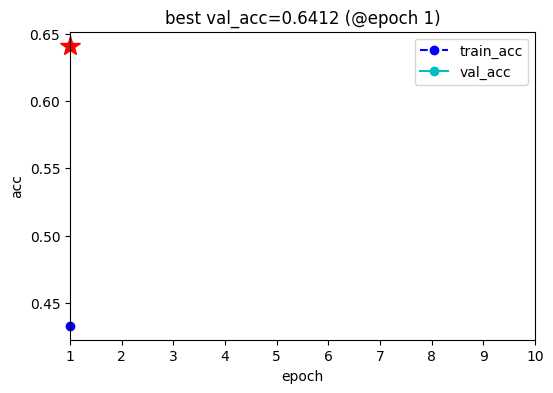

KeyboardInterrupt: 

In [47]:
from torchkeras import KerasModel   
  
class StepRunner:  
    def __init__(self, net, loss_fn,   
                 accelerator=None, stage = "train", metrics_dict = None,   
                 optimizer = None, lr_scheduler = None  
                 ):  
        self.net,self.loss_fn,self.metrics_dict,self.stage = net,loss_fn,metrics_dict,stage  
        self.optimizer,self.lr_scheduler = optimizer,lr_scheduler  
        self.accelerator = accelerator  
        if self.stage=='train':  
            self.net.train()   
        else:  
            self.net.eval()  
      
    def __call__(self, batch):  
        src,tgt = batch   
        mbatch = MaskedBatch(src=src,tgt=tgt,pad = 0)  
          
        #loss  
        with self.accelerator.autocast():  
            preds = net.forward(mbatch.src, mbatch.tgt, mbatch.src_mask, mbatch.tgt_mask)  
            preds = preds.reshape(-1, preds.size(-1))  
            labels = mbatch.tgt_y.reshape(-1)  
            loss = loss_fn(preds, labels)/mbatch.ntokens   
              
            #filter padding  
            preds = preds.argmax(dim=-1).view(-1)[labels!=0]  
            labels = labels[labels!=0]  
  
  
        #backward()  
        if self.stage=="train" and self.optimizer is not None:  
            self.accelerator.backward(loss)  
            if self.accelerator.sync_gradients:  
                self.accelerator.clip_grad_norm_(self.net.parameters(), 1.0)  
            self.optimizer.step()  
            if self.lr_scheduler is not None:  
                self.lr_scheduler.step()  
            self.optimizer.zero_grad()  
              
        all_loss = self.accelerator.gather(loss).sum()  
        all_preds = self.accelerator.gather(preds)  
        all_labels = self.accelerator.gather(labels)  
          
          
        #losses (or plain metrics that can be averaged)  
        step_losses = {self.stage+"_loss":all_loss.item()}  
  
        step_metrics = {self.stage+"_"+name:metric_fn(all_preds, all_labels).item()   
                        for name,metric_fn in self.metrics_dict.items()}  
          
        if self.stage=="train":  
            if self.optimizer is not None:  
                step_metrics['lr'] = self.optimizer.state_dict()['param_groups'][0]['lr']  
            else:  
                step_metrics['lr'] = 0.0  
        return step_losses,step_metrics  
      
KerasModel.StepRunner = StepRunner   
  
from torchmetrics import Accuracy   
  
net = Transformer.from_config(src_vocab = len(vocab),tgt_vocab = len(vocab),  
                   N=5, d_model=64, d_ff=128, h=8, dropout=0.1)  
  
loss_fn = LabelSmoothingLoss(size=len(vocab),   
            padding_idx=0, smoothing=0.1)  
  
metrics_dict = {'acc':Accuracy(task='multiclass',num_classes=len(vocab))}   
optimizer = NoamOpt(net.parameters(),model_size=64)  
  
model = KerasModel(net,  
                   loss_fn=loss_fn,  
                   metrics_dict=metrics_dict,  
                   optimizer = optimizer)  
  
model.fit(  
    train_data=dl_train,  
    val_data=dl_val,  
    epochs=100,  
    ckpt_path='checkpoint',  
    patience=10,  
    monitor='val_acc',  
    mode='max',  
    callbacks=None,  
    plot=True  
)  


In [ ]:
def greedy_decode(net, src, src_mask, max_len, start_symbol):  
    net.eval()   
    memory = net.encode(src, src_mask)  
    ys = torch.full((len(src),max_len),start_symbol,dtype = src.dtype).to(src.device)  
    for i in range(max_len-1):  
        out = net.generator(net.decode(memory, src_mask,   
              ys, tril_mask(ys)))  
        ys[:,i+1]=out.argmax(dim=-1)[:,i]  
    return ys  
  
def get_raw_words(tensor,vocab_r) ->"str":  
    words = [vocab_r[i] for i in tensor.tolist()]  
    return words  
  
def get_words(tensor,vocab_r) ->"str":  
    s = "".join([vocab_r[i] for i in tensor.tolist()])  
    words = s[:s.find('<EOS>')].replace('<SOS>','')  
    return words  
  
def prepare(x,accelerator=model.accelerator):  
    return x.to(accelerator.device)  
##解码翻译结果  
net = model.net  
net.eval()   
net = prepare(net)  
src,tgt = get_data()  
src,tgt = prepare(src),prepare(tgt)  
mbatch = MaskedBatch(src=src.unsqueeze(dim=0),tgt=tgt.unsqueeze(dim=0))  
  
y_pred = greedy_decode(net,mbatch.src,mbatch.src_mask,50,vocab_y["<SOS>"])  
print("input:")  
print(get_words(mbatch.src[0],vocab_r),'\n') #标签结果  
print("ground truth:")  
print(get_words(mbatch.tgt[0],vocab_yr),'\n') #标签结果  
print("prediction:")  
print(get_words(y_pred[0],vocab_yr)) #解码预测结果，原始标签中<PAD>位置的预测可以忽略  


In [ ]:
from tqdm.auto import tqdm  
  
net = prepare(net)  
loop = tqdm(range(1,201))  
correct = 0  
for i in loop:  
    src,tgt = get_data()  
    src,tgt = prepare(src),prepare(tgt)  
    mbatch = MaskedBatch(src=src.unsqueeze(dim=0),tgt=tgt.unsqueeze(dim=0))  
    y_pred = greedy_decode(net,mbatch.src,mbatch.src_mask,50,vocab_y["<SOS>"])  
  
    inputs = get_words(mbatch.src[0],vocab_r) #标签结果  
    gt = get_words(mbatch.tgt[0],vocab_yr) #标签结果  
    preds = get_words(y_pred[0],vocab_yr) #解码预测结果，原始标签中<PAD>位置的预测可以忽略  
    if preds==gt:  
        correct+=1  
    loop.set_postfix(acc = correct/i)  
      
print("acc=",correct/len(loop))  

